# Исследование объявлений о продаже квартир

В вашем распоряжении данные сервиса Яндекс.Недвижимость — архив объявлений о продаже квартир в Санкт-Петербурге и соседних населённых пунктов за несколько лет. Нужно научиться определять рыночную стоимость объектов недвижимости. Ваша задача — установить параметры. Это позволит построить автоматизированную систему: она отследит аномалии и мошенническую деятельность. 

По каждой квартире на продажу доступны два вида данных. Первые вписаны пользователем, вторые — получены автоматически на основе картографических данных. Например, расстояние до центра, аэропорта, ближайшего парка и водоёма. 

### Откройте файл с данными и изучите общую информацию. 

In [1]:
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
data = pd.read_csv('/datasets/real_estate_data.csv', sep='\t')

In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23699 entries, 0 to 23698
Data columns (total 22 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   total_images          23699 non-null  int64  
 1   last_price            23699 non-null  float64
 2   total_area            23699 non-null  float64
 3   first_day_exposition  23699 non-null  object 
 4   rooms                 23699 non-null  int64  
 5   ceiling_height        14504 non-null  float64
 6   floors_total          23613 non-null  float64
 7   living_area           21796 non-null  float64
 8   floor                 23699 non-null  int64  
 9   is_apartment          2775 non-null   object 
 10  studio                23699 non-null  bool   
 11  open_plan             23699 non-null  bool   
 12  kitchen_area          21421 non-null  float64
 13  balcony               12180 non-null  float64
 14  locality_name         23650 non-null  object 
 15  airports_nearest   

In [4]:
data.head(20)

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
0,20,13000000.0,108.00,2019-03-07T00:00:00,3,2.70,16.0,51.00,8,NaN,...,25.00,NaN,Санкт-Петербург,18863.0,16028.0,1.0,482.0,2.0,755.0,NaN
1,7,3350000.0,40.40,2018-12-04T00:00:00,1,NaN,11.0,18.60,1,NaN,...,11.00,2.0,посёлок Шушары,12817.0,18603.0,0.0,NaN,0.0,NaN,81.0
2,10,5196000.0,56.00,2015-08-20T00:00:00,2,NaN,5.0,34.30,4,NaN,...,8.30,0.0,Санкт-Петербург,21741.0,13933.0,1.0,90.0,2.0,574.0,558.0
3,0,64900000.0,159.00,2015-07-24T00:00:00,3,NaN,14.0,NaN,9,NaN,...,NaN,0.0,Санкт-Петербург,28098.0,6800.0,2.0,84.0,3.0,234.0,424.0
4,2,10000000.0,100.00,2018-06-19T00:00:00,2,3.03,14.0,32.00,13,NaN,...,41.00,NaN,Санкт-Петербург,31856.0,8098.0,2.0,112.0,1.0,48.0,121.0
5,10,2890000.0,30.40,2018-09-10T00:00:00,1,NaN,12.0,14.40,5,NaN,...,9.10,NaN,городской посёлок Янино-1,NaN,NaN,NaN,NaN,NaN,NaN,55.0
6,6,3700000.0,37.30,2017-11-02T00:00:00,1,NaN,26.0,10.60,6,NaN,...,14.40,1.0,посёлок Парголово,52996.0,19143.0,0.0,NaN,0.0,NaN,155.0
7,5,7915000.0,71.60,2019-04-18T00:00:00,2,NaN,24.0,NaN,22,NaN,...,18.90,2.0,Санкт-Петербург,23982.0,11634.0,0.0,NaN,0.0,NaN,NaN
8,20,2900000.0,33.16,2018-05-23T00:00:00,1,NaN,27.0,15.43,26,NaN,...,8.81,NaN,посёлок Мурино,NaN,NaN,NaN,NaN,NaN,NaN,189.0
9,18,5400000.0,61.00,2017-02-26T00:00:00,3,2.50,9.0,43.60,7,NaN,...,6.50,2.0,Санкт-Петербург,50898.0,15008.0,0.0,NaN,0.0,NaN,289.0


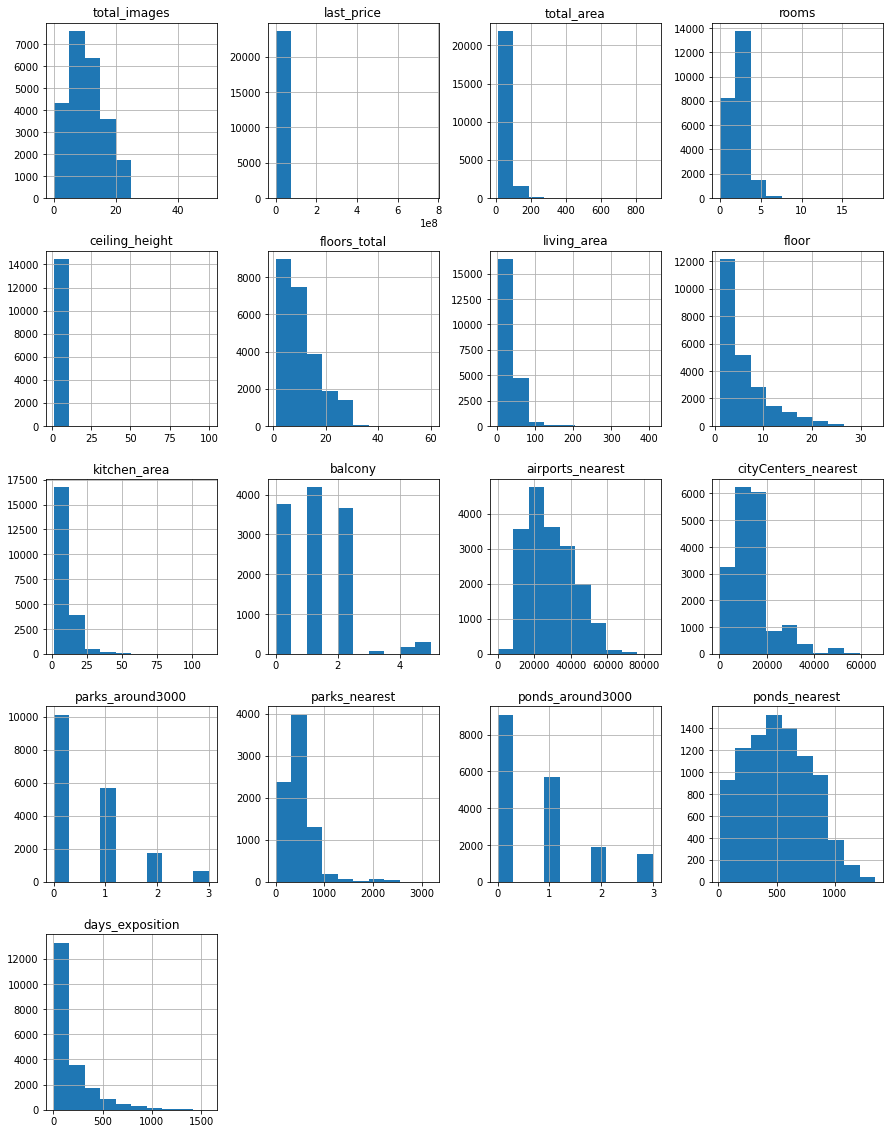

In [5]:
x = data.hist(figsize=(15, 20))
plt.show()

### Предобработка данных

In [6]:
data.isna().sum()

total_images                0
last_price                  0
total_area                  0
first_day_exposition        0
rooms                       0
ceiling_height           9195
floors_total               86
living_area              1903
floor                       0
is_apartment            20924
studio                      0
open_plan                   0
kitchen_area             2278
balcony                 11519
locality_name              49
airports_nearest         5542
cityCenters_nearest      5519
parks_around3000         5518
parks_nearest           15620
ponds_around3000         5518
ponds_nearest           14589
days_exposition          3181
dtype: int64

In [7]:
data['balcony'] = data['balcony'].fillna(0)

Если количество балконов не указано, скорее всего, балконов в квартире нет.

In [8]:
data['locality_name'] = data['locality_name'].fillna('unknown')

Если населенный пункт не указан - угадать мы его не можем, следовательно, можно заменить пропуски на строку "неизвестно"

In [9]:
data['is_apartment'] = data['is_apartment'].fillna(False)

Если значение параметра is_apartment не указано, скорее всего, помещение не является апартаментами.

In [10]:
data['ceiling_height'] = data['ceiling_height'].fillna(data['ceiling_height'].median())

Высота потолков - величина, принимающая значения из некого фиксированного списка, значит, логично заполнять пропуски медианным значением

In [11]:
for t in data['rooms'].unique():
    data.loc[(data['rooms'] == t) & (data['living_area'].isna()), 'living_area'] = \
    data.loc[(data['rooms'] == t), 'living_area'].median()

Площадь квартиры явно зависит от количества квартир, поэтому будем заполнять пропуски медианным значением среди всех квартир с тем же числом комнат.

In [12]:
data.loc[(data['studio'] == True) & (data['kitchen_area'].isna()), 'kitchen_area'] = 0
for t in data['rooms'].unique():
    data.loc[(data['rooms'] == t) & (data['kitchen_area'].isna()), 'kitchen_area'] = \
    data.loc[(data['rooms'] == t), 'kitchen_area'].median()

Если квартира - студия, площадь ее кухни можно считать нулевой; если нет, то можно предположить, что количество комнат коррелирует с размером кухни, и заполнить опять-таки медианным значением по количеству комнат.

In [13]:
data.loc[(data['parks_nearest'].isna()) & (data['parks_around3000'].isna()), 'parks_around3000'] = 0

Количество парков в радиусе 3 км не указано только для тех квартир, где не указана дистанция до ближайшего парка в принципе; из этого можно сделать вывод, что в радиусе 3 км от таких квартир нет парков.

In [14]:
data.loc[(data['ponds_nearest'].isna()) & (data['ponds_around3000'].isna()), 'ponds_around3000'] = 0

Аналогично с предыдущим пунктом - количество водоёмов в радиусе 3 км не указано только для тех квартир, где не указана дистанция до ближайшего водоёма в принципе; из этого можно сделать вывод, что в радиусе 3 км от таких квартир нет водоёмов.

In [15]:
median_ft = data[data['floors_total'].notna()]['floors_total'].median()
data['floors_total'] = data['floors_total'].fillna(median_ft)
data.loc[data['floors_total'] < data['floor'], 'floors_total'] = data['floor']

Количество этажей я заполнил следующим образом: сначала посчитал медианное значение этажей, потом заполнил им все пропуски, а потом там, где квартира находится на этаже выше медианного, предположил, что в таком случае можно считать, что квартира находится на послежнем этаже, и поменял количество этажей на этаж квартиры.

In [16]:
data.isna().sum()

total_images                0
last_price                  0
total_area                  0
first_day_exposition        0
rooms                       0
ceiling_height              0
floors_total                0
living_area                 0
floor                       0
is_apartment                0
studio                      0
open_plan                   0
kitchen_area                0
balcony                     0
locality_name               0
airports_nearest         5542
cityCenters_nearest      5519
parks_around3000            0
parks_nearest           15620
ponds_around3000            0
ponds_nearest           14589
days_exposition          3181
dtype: int64

Оставшиеся пропуски были оставлены без изменений. Показатели расстояния до ближайшего аэропорта/до центра города/ближайшего парка/ближайшего водоема, во-первых, кажутся менее важными, чме имеющаяся в таблице информация, а во-вторых - их невозможно заполнить никак, кроме подключения к проекту геолокации (или хотя бы указания адреса)).
Отсутствие количества дней, за которые квартира была продана, может означать, что квартира еще не была продана, что тоже является довольно важным показателем, так что эти значения оставлены без изменений.

Возможные причины появления пропусков в таблице:
- какие-то данные риэлтор посчитал непринципиальными для продажи квартиры
- какие-то данные не были включены в объявление о продаже, потому что выставляли квартиру в невыгодном свете тем или иным образом
- часть данных просто забыли внести (человеческий фактор)
- отсутствие количества дней, за которые квартира была продана, может означать, что квартира еще не продана

In [17]:
data['first_day_exposition'] = pd.to_datetime(data['first_day_exposition'], format='%Y-%m-%dT%H:%M:%S')
data['floors_total'] = data['floors_total'].astype('int64')
data['balcony'] = data['balcony'].astype('int64')
data['parks_around3000'] = data['parks_around3000'].astype('int64')
data['ponds_around3000'] = data['ponds_around3000'].astype('int64')
data['last_price'] = data['last_price'].astype('int64')
data['is_apartment'] = data['is_apartment'].astype('bool')

Столбец с датой публикации нужно перевести в datetime - так с ним дальше будет удобнее работать.
Столбцы с общим количеством этажей, количеством балконов и количеством парков/водоемов в радиусе 3 км, можно перевести в int - это явно целые числа. (столбец в количеством дней до продажи тоже можно было бы, но там не получилось это сделать из-за пропущенных значений..)
Столбец is_apartment нужно перевести в bool, так как там значения - True или False.

In [18]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23699 entries, 0 to 23698
Data columns (total 22 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   total_images          23699 non-null  int64         
 1   last_price            23699 non-null  int64         
 2   total_area            23699 non-null  float64       
 3   first_day_exposition  23699 non-null  datetime64[ns]
 4   rooms                 23699 non-null  int64         
 5   ceiling_height        23699 non-null  float64       
 6   floors_total          23699 non-null  int64         
 7   living_area           23699 non-null  float64       
 8   floor                 23699 non-null  int64         
 9   is_apartment          23699 non-null  bool          
 10  studio                23699 non-null  bool          
 11  open_plan             23699 non-null  bool          
 12  kitchen_area          23699 non-null  float64       
 13  balcony         

In [19]:
data['locality_name'].unique()


array(['Санкт-Петербург', 'посёлок Шушары', 'городской посёлок Янино-1',
       'посёлок Парголово', 'посёлок Мурино', 'Ломоносов', 'Сертолово',
       'Петергоф', 'Пушкин', 'деревня Кудрово', 'Коммунар', 'Колпино',
       'поселок городского типа Красный Бор', 'Гатчина', 'поселок Мурино',
       'деревня Фёдоровское', 'Выборг', 'Кронштадт', 'Кировск',
       'деревня Новое Девяткино', 'посёлок Металлострой',
       'посёлок городского типа Лебяжье',
       'посёлок городского типа Сиверский', 'поселок Молодцово',
       'поселок городского типа Кузьмоловский',
       'садовое товарищество Новая Ропша', 'Павловск',
       'деревня Пикколово', 'Всеволожск', 'Волхов', 'Кингисепп',
       'Приозерск', 'Сестрорецк', 'деревня Куттузи', 'посёлок Аннино',
       'поселок городского типа Ефимовский', 'посёлок Плодовое',
       'деревня Заклинье', 'поселок Торковичи', 'поселок Первомайское',
       'Красное Село', 'посёлок Понтонный', 'Сясьстрой', 'деревня Старая',
       'деревня Лесколово', '

In [20]:
duplicates_poselok = ['поселок городского типа', 'посёлок городского типа', 'поселок при железнодорожной станции',\
                      'посёлок при железнодорожной станции', 'коттеджный поселок', 'коттеджный посёлок', 'поселок', \
                     'городской поселок', 'городской посёлок', 'поселок станции', 'посёлок станции']
duplicates_snt = ['садовое товарищество', 'садоводческое товарищество', 'садовое некоммерческое товарищество', \
                 'садоводческое некоммерческое товарищество']
data['locality_name'] = data['locality_name'].replace(duplicates_poselok, 'посёлок', regex=True)
data['locality_name'] = data['locality_name'].replace(duplicates_snt, 'СНТ', regex=True)

In [21]:
data['locality_name'].unique()

array(['Санкт-Петербург', 'посёлок Шушары', 'посёлок Янино-1',
       'посёлок Парголово', 'посёлок Мурино', 'Ломоносов', 'Сертолово',
       'Петергоф', 'Пушкин', 'деревня Кудрово', 'Коммунар', 'Колпино',
       'посёлок Красный Бор', 'Гатчина', 'деревня Фёдоровское', 'Выборг',
       'Кронштадт', 'Кировск', 'деревня Новое Девяткино',
       'посёлок Металлострой', 'посёлок Лебяжье', 'посёлок Сиверский',
       'посёлок Молодцово', 'посёлок Кузьмоловский', 'СНТ Новая Ропша',
       'Павловск', 'деревня Пикколово', 'Всеволожск', 'Волхов',
       'Кингисепп', 'Приозерск', 'Сестрорецк', 'деревня Куттузи',
       'посёлок Аннино', 'посёлок Ефимовский', 'посёлок Плодовое',
       'деревня Заклинье', 'посёлок Торковичи', 'посёлок Первомайское',
       'Красное Село', 'посёлок Понтонный', 'Сясьстрой', 'деревня Старая',
       'деревня Лесколово', 'посёлок Новый Свет', 'Сланцы',
       'село Путилово', 'Ивангород', 'Мурино', 'Шлиссельбург',
       'Никольское', 'Зеленогорск', 'Сосновый Бор', 

In [22]:
data['locality_name'] = data['locality_name'].replace('посёлок Жилпосёлок', 'посёлок Жилгородок') 
#видимо, регулярка случайно поменяла название поселка :)

In [23]:
data['locality_name'].unique()

array(['Санкт-Петербург', 'посёлок Шушары', 'посёлок Янино-1',
       'посёлок Парголово', 'посёлок Мурино', 'Ломоносов', 'Сертолово',
       'Петергоф', 'Пушкин', 'деревня Кудрово', 'Коммунар', 'Колпино',
       'посёлок Красный Бор', 'Гатчина', 'деревня Фёдоровское', 'Выборг',
       'Кронштадт', 'Кировск', 'деревня Новое Девяткино',
       'посёлок Металлострой', 'посёлок Лебяжье', 'посёлок Сиверский',
       'посёлок Молодцово', 'посёлок Кузьмоловский', 'СНТ Новая Ропша',
       'Павловск', 'деревня Пикколово', 'Всеволожск', 'Волхов',
       'Кингисепп', 'Приозерск', 'Сестрорецк', 'деревня Куттузи',
       'посёлок Аннино', 'посёлок Ефимовский', 'посёлок Плодовое',
       'деревня Заклинье', 'посёлок Торковичи', 'посёлок Первомайское',
       'Красное Село', 'посёлок Понтонный', 'Сясьстрой', 'деревня Старая',
       'деревня Лесколово', 'посёлок Новый Свет', 'Сланцы',
       'село Путилово', 'Ивангород', 'Мурино', 'Шлиссельбург',
       'Никольское', 'Зеленогорск', 'Сосновый Бор', 

In [24]:
data.sort_values('total_images', ascending=False)

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
12667,50,20500000,76.0,2017-12-10,3,2.65,20,47.00,16,False,...,29.0,0,Санкт-Петербург,50812.0,16141.0,0,NaN,0,NaN,5.0
9778,50,11000000,87.0,2017-10-25,2,2.65,25,32.50,11,False,...,31.0,5,Санкт-Петербург,9586.0,11649.0,0,NaN,0,NaN,3.0
17396,50,14500000,119.7,2017-12-02,4,4.00,4,87.50,3,False,...,13.5,0,Санкт-Петербург,24375.0,2410.0,1,551.0,2,617.0,106.0
15157,42,17998000,138.6,2017-09-27,4,2.65,18,93.10,17,False,...,16.0,2,Санкт-Петербург,34991.0,11920.0,0,NaN,0,NaN,172.0
1058,39,1900000,63.0,2017-09-29,3,2.65,5,44.20,5,False,...,6.3,1,деревня Лопухинка,NaN,NaN,0,NaN,0,NaN,106.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15267,0,6700000,81.0,2017-04-14,3,2.65,5,45.00,3,False,...,9.5,0,Санкт-Петербург,29407.0,8109.0,1,702.0,1,974.0,42.0
8140,0,3515000,40.4,2017-08-09,1,3.00,5,16.51,4,False,...,12.0,0,Пушкин,15696.0,27850.0,1,966.0,1,450.0,5.0
4103,0,5750000,71.2,2017-11-10,3,3.00,5,48.80,4,False,...,9.5,1,Санкт-Петербург,29364.0,8212.0,1,463.0,0,NaN,60.0
18237,0,4000000,54.0,2017-11-09,2,2.65,14,30.50,14,False,...,8.8,0,Санкт-Петербург,51954.0,17067.0,1,1064.0,3,224.0,144.0


In [25]:
data.sort_values('total_area', ascending=False)

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
19540,8,420000000,900.0,2017-12-06,12,2.80,25,409.7,25,False,...,112.0,0,Санкт-Петербург,30706.0,7877.0,0,NaN,2,318.0,106.0
12859,20,140000000,631.2,2019-04-09,7,3.90,4,322.3,4,False,...,19.5,1,Санкт-Петербург,25707.0,4972.0,0,NaN,2,210.0,NaN
3117,19,140000000,631.0,2019-03-30,7,2.65,5,145.0,5,False,...,60.0,0,Санкт-Петербург,25707.0,4972.0,0,NaN,2,210.0,NaN
15651,20,300000000,618.0,2017-12-18,7,3.40,7,258.0,5,False,...,70.0,0,Санкт-Петербург,32440.0,5297.0,0,NaN,2,198.0,111.0
5358,20,65000000,590.0,2019-02-14,15,3.50,6,409.0,3,False,...,100.0,0,Санкт-Петербург,24447.0,4666.0,1,767.0,0,NaN,14.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19558,2,1686000,13.2,2018-12-17,1,2.65,5,17.6,1,False,...,9.0,0,Санкт-Петербург,19891.0,4165.0,1,361.0,1,155.0,19.0
19807,0,3800000,13.0,2018-07-04,1,2.65,5,10.0,3,False,...,9.0,0,Санкт-Петербург,21302.0,1242.0,1,592.0,3,27.0,9.0
19546,3,1850000,13.0,2019-03-11,1,3.40,5,17.6,2,False,...,9.0,0,Санкт-Петербург,24915.0,5483.0,1,644.0,0,NaN,24.0
17961,3,1400000,13.0,2017-12-03,1,2.60,9,17.6,1,False,...,9.0,0,Санкт-Петербург,14350.0,15945.0,0,NaN,1,185.0,410.0


In [26]:
data.sort_values('rooms', ascending=False)

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
14498,6,32250000,374.60,2018-06-09,19,2.65,5,264.5,2,False,...,27.6,0,Санкт-Петербург,19497.0,3574.0,0,NaN,2,548.0,114.0
18848,6,28500000,270.00,2015-03-02,16,3.00,4,180.0,4,False,...,13.0,1,Санкт-Петербург,23575.0,4142.0,1,516.0,0,NaN,1365.0
5358,20,65000000,590.00,2019-02-14,15,3.50,6,409.0,3,False,...,100.0,0,Санкт-Петербург,24447.0,4666.0,1,767.0,0,NaN,14.0
20829,6,28659000,245.40,2016-03-31,14,2.65,4,168.3,2,False,...,25.9,0,Санкт-Петербург,21104.0,2054.0,3,541.0,2,118.0,95.0
866,5,25000000,363.00,2017-12-23,14,3.16,5,222.0,4,False,...,16.6,0,Санкт-Петербург,38076.0,7950.0,0,NaN,2,435.0,418.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12737,10,2300000,20.50,2018-07-01,0,2.65,25,15.5,13,False,...,0.0,0,посёлок Мурино,NaN,NaN,0,NaN,0,NaN,30.0
15569,2,1899400,23.30,2018-07-17,0,2.70,4,16.1,4,False,...,0.0,2,Сертолово,NaN,NaN,0,NaN,0,NaN,60.0
11331,6,1315000,27.32,2017-09-29,0,2.70,15,18.7,15,False,...,0.0,0,Никольское,NaN,NaN,0,NaN,0,NaN,116.0
9817,8,2190000,19.00,2018-10-12,0,3.50,5,15.0,1,False,...,0.0,0,Санкт-Петербург,29561.0,8264.0,2,383.0,1,781.0,89.0


In [27]:
data.sort_values('ceiling_height', ascending=False)

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
22869,0,15000000,25.0,2018-07-25,1,100.00,5,14.0,5,True,...,11.00,5,Санкт-Петербург,34963.0,8283.0,1,223.0,3,30.0,19.0
3148,14,2900000,75.0,2018-11-12,3,32.00,3,53.0,2,False,...,8.00,0,Волхов,NaN,NaN,0,NaN,0,NaN,NaN
22336,19,9999000,92.4,2019-04-05,2,32.00,6,55.5,5,False,...,16.50,4,Санкт-Петербург,18838.0,3506.0,0,NaN,3,511.0,NaN
21377,19,4900000,42.0,2017-04-18,1,27.50,24,37.7,19,False,...,11.00,2,Санкт-Петербург,42742.0,9760.0,0,NaN,0,NaN,61.0
4876,7,3000000,25.0,2017-09-27,0,27.00,25,17.0,17,False,...,0.00,2,посёлок Мурино,NaN,NaN,0,NaN,0,NaN,28.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2572,4,2400000,62.0,2018-12-27,3,2.00,5,40.0,4,False,...,6.00,1,Луга,NaN,NaN,0,NaN,0,NaN,NaN
22960,17,2300000,53.6,2018-10-18,2,2.00,2,19.0,1,False,...,10.00,0,Всеволожск,NaN,NaN,0,NaN,0,NaN,NaN
16934,5,4100000,40.0,2017-10-17,1,1.75,37,17.4,5,False,...,8.34,0,Санкт-Петербург,18732.0,20444.0,0,NaN,3,80.0,71.0
5712,5,1500000,42.8,2017-08-14,2,1.20,2,27.5,1,False,...,5.20,0,посёлок Мга,NaN,NaN,0,NaN,0,NaN,248.0


In [28]:
data.sort_values('floors_total', ascending=False)

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
2253,12,3800000,45.5,2018-06-28,2,2.88,60,27.4,4,False,...,7.40,0,Кронштадт,67763.0,49488.0,2,342.0,3,614.0,166.0
16731,9,3978000,40.0,2018-09-24,1,2.65,52,10.5,18,False,...,14.00,0,Санкт-Петербург,20728.0,12978.0,1,793.0,0,NaN,45.0
16934,5,4100000,40.0,2017-10-17,1,1.75,37,17.4,5,False,...,8.34,0,Санкт-Петербург,18732.0,20444.0,0,NaN,3,80.0,71.0
397,15,5990000,54.0,2018-03-22,2,2.65,36,21.4,28,False,...,18.70,1,Санкт-Петербург,18732.0,20444.0,0,NaN,3,80.0,11.0
5807,17,8150000,80.0,2019-01-09,2,27.00,36,41.0,13,False,...,12.00,5,Санкт-Петербург,18732.0,20444.0,0,NaN,3,80.0,38.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17020,10,3700000,100.0,2018-01-01,3,3.00,1,35.0,1,False,...,22.00,0,деревня Каськово,NaN,NaN,0,NaN,0,NaN,346.0
3076,20,2000000,80.0,2018-01-03,3,2.65,1,48.5,1,False,...,10.00,0,Волосово,NaN,NaN,0,NaN,0,NaN,44.0
8335,10,2700000,80.0,2018-07-07,3,3.00,1,45.0,1,False,...,15.00,0,Луга,NaN,NaN,0,NaN,0,NaN,51.0
4379,5,5300000,58.5,2017-11-15,2,2.65,1,31.6,1,False,...,9.40,0,посёлок Рощино,NaN,NaN,0,NaN,0,NaN,226.0


In [29]:
data[data['floor'] > data['floors_total']]

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition


In [30]:
data.sort_values('balcony', ascending=False)

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
15152,9,10200000,70.6,2018-11-14,2,3.10,17,42.3,7,False,...,11.6,5,Санкт-Петербург,9273.0,11391.0,1,531.0,1,935.0,103.0
19525,17,8370000,64.4,2019-02-19,2,2.80,23,30.1,4,False,...,13.0,5,Санкт-Петербург,32447.0,13064.0,0,NaN,0,NaN,NaN
3344,27,23500000,134.0,2017-11-10,4,2.65,16,59.0,14,False,...,37.0,5,Санкт-Петербург,31344.0,6673.0,1,545.0,1,198.0,90.0
17526,13,11000000,73.9,2019-03-31,2,2.80,25,39.9,22,False,...,15.2,5,Санкт-Петербург,36575.0,12097.0,1,610.0,1,654.0,NaN
3335,12,6700000,73.4,2017-10-19,3,2.50,9,44.3,5,False,...,8.9,5,Санкт-Петербург,51571.0,16814.0,0,NaN,0,NaN,453.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9666,6,4600000,42.9,2019-01-08,1,2.75,27,17.7,15,False,...,13.9,0,посёлок Парголово,52610.0,18787.0,0,NaN,0,NaN,NaN
9665,6,2600000,31.3,2017-04-20,1,2.65,4,18.2,2,False,...,5.6,0,Санкт-Петербург,18459.0,17461.0,1,613.0,0,NaN,15.0
9663,11,6400000,77.0,2019-03-05,3,2.65,22,43.0,6,False,...,12.5,0,Санкт-Петербург,42165.0,21481.0,0,NaN,0,NaN,45.0
9662,10,7900000,67.0,2018-09-06,2,2.60,20,41.1,4,False,...,11.6,0,Санкт-Петербург,35068.0,16167.0,0,NaN,0,NaN,89.0


In [31]:
data.sort_values('kitchen_area', ascending=False)

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
19540,8,420000000,900.0,2017-12-06,12,2.80,25,409.7,25,False,...,112.0,0,Санкт-Петербург,30706.0,7877.0,0,NaN,2,318.0,106.0
20215,2,85000000,249.7,2018-02-01,3,2.65,10,72.0,9,False,...,107.0,4,Санкт-Петербург,31532.0,4624.0,1,2218.0,2,99.0,26.0
2489,9,12500000,255.0,2017-04-21,3,2.65,2,153.9,2,False,...,100.7,0,Санкт-Петербург,29544.0,6916.0,0,NaN,3,198.0,102.0
5358,20,65000000,590.0,2019-02-14,15,3.50,6,409.0,3,False,...,100.0,0,Санкт-Петербург,24447.0,4666.0,1,767.0,0,NaN,14.0
16239,5,82400000,181.1,2017-05-24,3,3.90,9,58.2,4,False,...,93.2,0,Санкт-Петербург,25525.0,5845.0,2,116.0,0,NaN,501.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6612,18,3590000,26.8,2017-11-10,0,2.65,24,19.0,20,False,...,0.0,0,Санкт-Петербург,11022.0,12679.0,0,NaN,0,NaN,15.0
697,12,2500000,24.1,2017-12-01,0,2.75,25,17.5,21,False,...,0.0,0,деревня Кудрово,NaN,NaN,0,NaN,0,NaN,201.0
10273,8,1870000,20.5,2016-04-04,0,2.65,15,15.8,13,False,...,0.0,2,посёлок Мурино,NaN,NaN,0,NaN,0,NaN,856.0
716,5,1500000,17.0,2017-06-07,0,2.70,9,12.0,1,False,...,0.0,0,посёлок Шушары,18654.0,29846.0,0,NaN,0,NaN,40.0


In [32]:
data['parks_around3000'].unique()

array([1, 0, 2, 3])

In [33]:
data['ponds_around3000'].unique()

array([2, 0, 3, 1])

In [34]:
data['cityCenters_nearest'].unique()

array([16028., 18603., 13933., ..., 27977.,  7262.,  6263.])

После рассмотрения сортировок по всем столбцам с числовыми значениями я делаю вывод, что аномальные значения есть только в столбце с высотой потолков - в остальных столбцах минимумы и максимумы выглядят правдоподобно.

In [35]:
data = data.query('2.5 <= ceiling_height <= 32')

In [36]:
pd.options.mode.chained_assignment = None
data.loc[data['ceiling_height'] >= 20, 'ceiling_height'] = data['ceiling_height']/10

In [37]:
data = data.query('2.5 <= ceiling_height <= 10')

In [38]:
data.sort_values('ceiling_height', ascending=False)

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
5863,20,5650000,45.0,2018-08-15,1,8.3,16,19.3,14,False,...,8.3,1,Санкт-Петербург,13069.0,10763.0,0,NaN,1,613.0,14.0
17442,0,5350000,54.0,2015-06-16,2,8.0,5,29.0,2,False,...,8.8,1,Красное Село,24638.0,28062.0,0,NaN,0,NaN,469.0
3474,3,1400000,30.0,2018-03-16,1,8.0,5,15.3,2,False,...,7.3,0,деревня Нурма,NaN,NaN,0,NaN,0,NaN,125.0
15743,14,5600000,67.0,2016-11-11,3,8.0,16,41.0,1,False,...,8.0,0,Санкт-Петербург,32691.0,11035.0,1,723.0,0,NaN,474.0
20264,17,119000000,187.6,2017-07-10,4,6.0,7,147.0,7,False,...,15.6,0,Санкт-Петербург,26902.0,5605.0,3,484.0,1,305.0,259.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10046,13,4500000,41.4,2018-01-16,2,2.5,5,28.0,5,False,...,5.3,1,Сестрорецк,58086.0,35014.0,1,378.0,2,199.0,279.0
4515,7,2400000,53.2,2019-03-01,3,2.5,5,36.5,3,False,...,5.0,0,Кингисепп,NaN,NaN,0,NaN,0,NaN,NaN
10042,8,4740000,47.5,2018-06-17,2,2.5,10,31.1,6,False,...,7.8,0,Санкт-Петербург,13652.0,11927.0,0,NaN,1,504.0,78.0
19238,9,5800000,52.0,2018-12-12,2,2.5,5,28.1,5,False,...,12.2,0,Санкт-Петербург,20057.0,6170.0,1,288.0,0,NaN,47.0


Из набора данных были удалены строки с очевидно слишком низкими или очевидно слишком высокими потолками; потолки высотой больше 20, но меньше 100 метров были разделены на 10 (скорее всего, тут была техническая ошибка), потом опять удалены очевидно слишклм низкие(меньше 2,5 м) и слишком высокие (больше 10 м).

In [39]:
data.duplicated().sum()

0

Следовательно, в оставшихся данных нет явных дубликатов.

В процессе предобработки данных были заполнены пропуски в следующих столбцах:
- количество балконов (0, если не указаны, т.к. в этом случае балконов скорее всего нет)
- высота потолков (медианным значением)
- количество этажей (сначала посчитал медианное значение этажей, потом заполнил им все пропуски, а потом там, где квартира находится на этаже выше медианного, предположил, что в таком случае можно считать, что квартира находится на последнем этаже, и поменял количество этажей на этаж квартиры)
- is_apartment (если не было указано, считал, что значение False)
- название населенного пункта (заглушкой 'unknown')
- парки в радиусе 3 км (если не указано - таких парков нет)
- водоемы в радиусе 3 км (аналогично)
- количество комнат (медианой по жилой площади)
- площадь кухни (если не студия - медианой по жилой площади, если студия - то 0)

Пропуски в столбцах с расстоянием до центра города, до ближайшего аэропорта, ближайшего парка, ближайшего водоема и количеством дней, за которое квартира была продана, были оставлены без изменений. Показатели расстояния до ближайшего аэропорта/до центра города/ближайшего парка/ближайшего водоема, во-первых, кажутся менее важными, чем имеющаяся в таблице информация, а во-вторых - их невозможно заполнить никак, кроме подключения к проекту геолокации (или хотя бы указания адреса)).
Отсутствие количества дней, за которые квартира была продана, может означать, что квартира еще не была продана, что тоже является довольно важным показателем, так что эти значения оставлены без изменений.

Были изменены типы данных в столбцах:
- дата публикации объявления (на datetime)
- общее количество этажей (int)
- is_apartment (bool)
- количество балконов (int)
- количество парков/водоемов в радиусе 3 км (int)
- цена (int)

Была выполнена проверка на явные дубликаты (их не обнаружено), устранены неявные дубликаты в столбце с названием населенного пункта.

Были устранены аномальные значения в столбце с высотой потолка; также все остальные столбцы были проверены на наличие аномальных значений, их не было обнаружено.

### Посчитайте и добавьте в таблицу новые столбцы

In [40]:
data.isna().sum()

total_images                0
last_price                  0
total_area                  0
first_day_exposition        0
rooms                       0
ceiling_height              0
floors_total                0
living_area                 0
floor                       0
is_apartment                0
studio                      0
open_plan                   0
kitchen_area                0
balcony                     0
locality_name               0
airports_nearest         5511
cityCenters_nearest      5488
parks_around3000            0
parks_nearest           15571
ponds_around3000            0
ponds_nearest           14535
days_exposition          3170
dtype: int64

In [41]:
data['m2_cost'] = data['last_price']/data['total_area']

In [42]:
data['weekday'] = data['first_day_exposition'].dt.weekday

In [43]:
data['month'] = data['first_day_exposition'].dt.month

In [44]:
data['year'] = data['first_day_exposition'].dt.year

In [45]:
def group_floors(row):
    if row['floor'] == 1:
        return 'первый'
    if row['floor'] == row['floors_total']:
        return 'последний'
    else:
        return 'другой'

data['floor_group'] = data.apply(group_floors, axis=1)

In [46]:
def m_to_km(dist):
    if pd.isna(dist):
        return dist
    else:
        dist_km = dist / 1000
        dist_km = round(dist_km, 1)
        if dist_km % 1 == 5:
            return int(dist_km) + 1
        else:
            return int(round(dist_km))
data['cityCenters_km'] = data['cityCenters_nearest'].apply(m_to_km)

In [47]:
data.sort_values('cityCenters_km', ascending=False)

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,parks_nearest,ponds_around3000,ponds_nearest,days_exposition,m2_cost,weekday,month,year,floor_group,cityCenters_km
5340,19,3600000,50.6,2019-03-19,2,2.50,5,29.9,4,False,...,NaN,0,NaN,NaN,71146.245059,1,3,2019,другой,66.0
9640,8,4200000,51.4,2014-12-10,2,2.55,5,31.0,2,False,...,NaN,0,NaN,1194.0,81712.062257,2,12,2014,другой,66.0
577,7,4000000,59.0,2017-07-23,3,2.50,5,37.0,1,False,...,NaN,0,NaN,NaN,67796.610169,6,7,2017,первый,66.0
20746,1,3300000,43.5,2016-02-16,2,2.55,4,27.2,2,False,...,NaN,0,NaN,1043.0,75862.068966,1,2,2016,другой,65.0
5218,15,3650000,53.8,2018-09-24,3,2.50,4,36.9,3,False,...,NaN,0,NaN,121.0,67843.866171,0,9,2018,другой,65.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23683,16,2100000,62.8,2018-09-18,4,2.50,5,45.5,3,False,...,NaN,0,NaN,NaN,33439.490446,1,9,2018,другой,NaN
23692,2,1350000,30.0,2017-07-07,1,2.65,5,17.5,4,False,...,NaN,0,NaN,413.0,45000.000000,4,7,2017,другой,NaN
23695,14,3100000,59.0,2018-01-15,3,2.65,5,38.0,4,False,...,NaN,0,NaN,45.0,52542.372881,0,1,2018,другой,NaN
23696,18,2500000,56.7,2018-02-11,2,2.65,3,29.7,1,False,...,NaN,0,NaN,NaN,44091.710758,6,2,2018,первый,NaN


In [48]:
data['cityCenters_km'].unique()

array([16., 19., 14.,  7.,  8., nan, 12., 15., 52., 33., 31., 11., 13.,
       10.,  2., 32.,  4., 17., 30.,  5., 51., 50., 24., 18.,  9., 28.,
        3.,  6., 27., 21., 49., 35., 26., 36., 34.,  1., 29., 53., 22.,
       55., 20., 23., 25.,  0., 66., 47., 40., 57., 37., 41., 43., 48.,
       62., 60., 42., 65., 39., 54., 59., 38., 45., 63.])

Не все значения в километрах выглядят правдоподобно - возможно, часть из них тоже случайно была умножена на 10.

### Проведите исследовательский анализ данных

array([[<AxesSubplot:title={'center':'total_area'}>]], dtype=object)

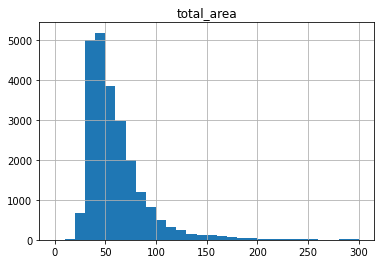

In [49]:
data.hist('total_area', bins=30, range=(0, 300))

Видно, что общая площадь сдаваемых квартир распределена по Пуассону. Распределение выглядит правильно, без пиков там, где их быть не должно.

array([[<AxesSubplot:title={'center':'living_area'}>]], dtype=object)

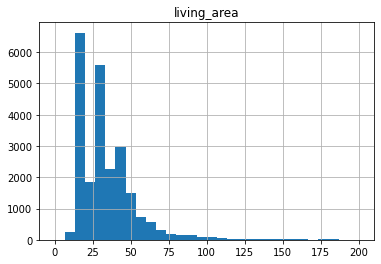

In [50]:
data.hist('living_area', bins=30, range=(0, 200))

Распределение жилой площади довольно похоже на распределение общей площади, пик у них примерно в одном месте (что логично), но ближе к 0 график жилой площади заметно ниже; это может быть связано с тем, что в маленьких квартирах, особенно в студиях, вся или почти вся площадь - жилая.

array([[<AxesSubplot:title={'center':'kitchen_area'}>]], dtype=object)

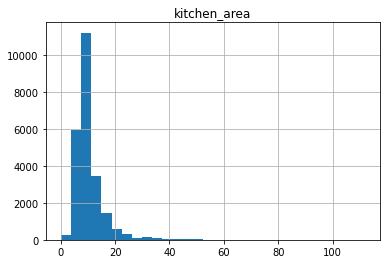

In [51]:
data.hist('kitchen_area', bins=30)

Распределение опять-таки похоже на распределения двух других видов площадей; опять видно, что в маленьких квартирах кухни почти нет; тут пик смещен правее, чем в двух предыдущих графиках, это опять-таки подтверждает наблюдение про размер кухни в маленьких квартирах.

array([[<AxesSubplot:title={'center':'last_price'}>]], dtype=object)

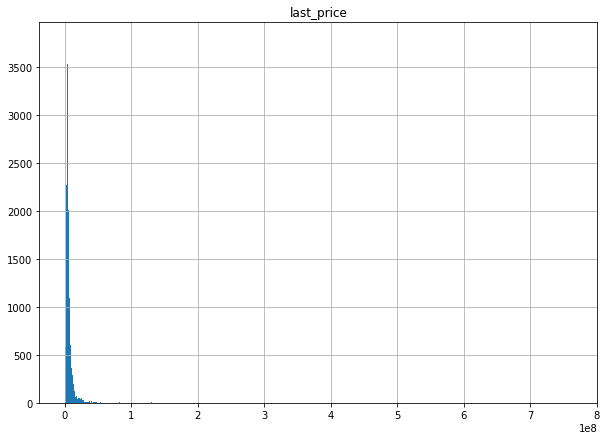

In [52]:
data.hist('last_price', bins=1000, figsize=(10, 7))

В случае с этим графиком потребовалось задать большое количество корзин, чтобы отследить, что на самом деле пик все-таки не совсем около 0, а недалеко от него, и распределение все-таки выглядит как обычное пуассоновское.

array([[<AxesSubplot:title={'center':'rooms'}>]], dtype=object)

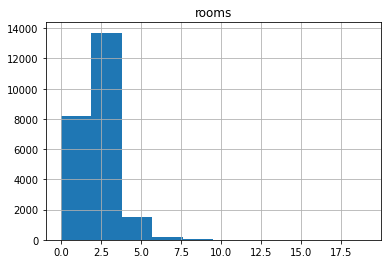

In [53]:
data.hist('rooms')

В распределении количества комнат тоже нет ничего необычного, оно опять-таки выглядит стандартным пуассоновским распределением.

array([[<AxesSubplot:title={'center':'ceiling_height'}>]], dtype=object)

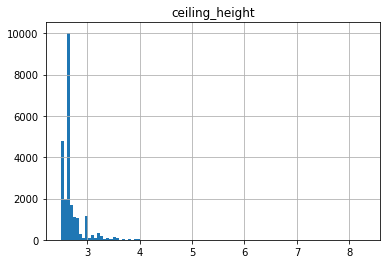

In [54]:
data.hist('ceiling_height', bins=100)

Здесь на гистограмме можно наблюдать неожиданный пик около 0 - это может быть связано с тем, что большое количество пропусков было заполнено медианным значением, а оно не очень большое.

array([[<AxesSubplot:title={'center':'floor'}>]], dtype=object)

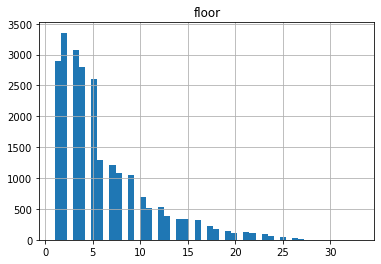

In [55]:
data.hist('floor', bins=50)

Этажи квартир тоже оказались распределены тоже по Пуассону - довольно много квартир на низких этажах.

<AxesSubplot:>

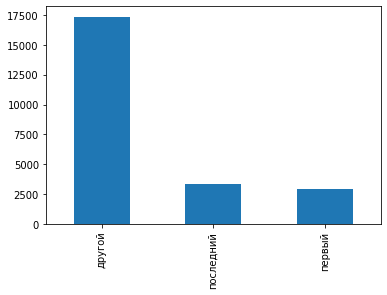

In [56]:
floors_grouped = data['floor_group'].value_counts()
floors_grouped.plot(kind='bar')

<AxesSubplot:>

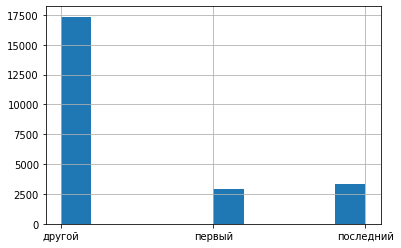

In [82]:
data['floor_group'].hist()

Видно, что на последнем и первом этажах примерно поровну квартир, а на этажах, не являющихся ни первым, ни последним - в 5-6 раз больше.

array([[<AxesSubplot:title={'center':'floors_total'}>]], dtype=object)

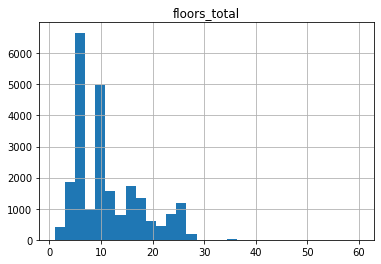

In [57]:
data.hist('floors_total', bins=30)

У графика количества этажей есть несколько пиков; это может быть связано с тем, что существует набор стандартных значений для количества этажей (много 5-этажек, 10-этажек, в целом - количество этажей часто делится на 5)

array([[<AxesSubplot:title={'center':'cityCenters_nearest'}>]],
      dtype=object)

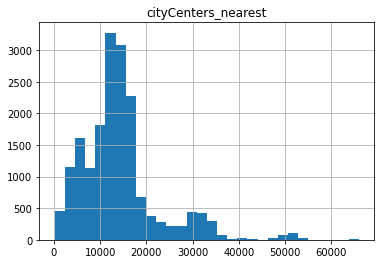

In [58]:
data.hist('cityCenters_nearest', bins=30)

Есть несколько выбивающихся значений в районе 50000 и 60000 - возможно, это указаны квартиры в деревнях Ленинградской области, а расстояние посчитано до центра Санкт-Петербурга.

array([[<AxesSubplot:title={'center':'airports_nearest'}>]], dtype=object)

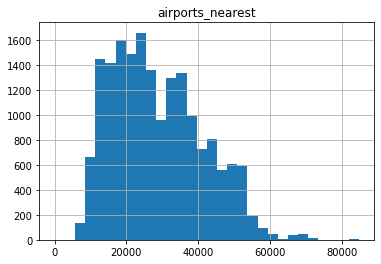

In [59]:
data.hist('airports_nearest', bins=30)

Расстояние до аэропорта тоже распределено по Пуассону, есть небольшой выброс около 80000.

array([[<AxesSubplot:title={'center':'parks_nearest'}>]], dtype=object)

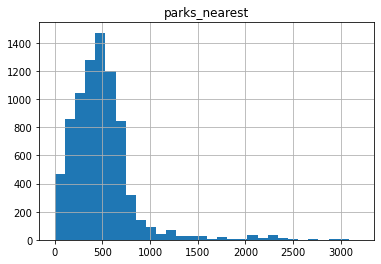

In [60]:
data.hist('parks_nearest', bins=30)

Распределение расстояния до ближайшего парка выглядит как абсолютно стандартное распределение Пуассона.

array([[<AxesSubplot:title={'center':'ponds_nearest'}>]], dtype=object)

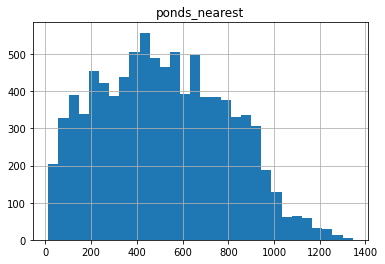

In [61]:
data.hist('ponds_nearest', bins=30)

Распределение выглядит стандартно, даже слегка смещено к центру, что делает его похожим на нормальное.

array([[<AxesSubplot:title={'center':'weekday'}>]], dtype=object)

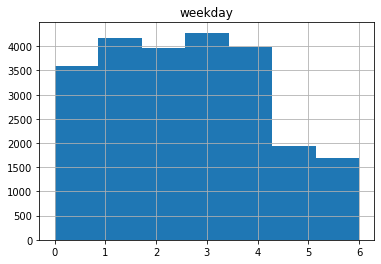

In [62]:
data.hist('weekday', bins=7)

Видно, что в выходные публикуется значительно меньше объявлений, чем в будние дни.

array([[<AxesSubplot:title={'center':'month'}>]], dtype=object)

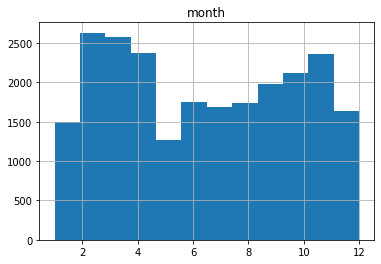

In [63]:
data.hist('month', bins=12)

Из графика видно, что больше всего объявлений публикуется в феврале, марте, апреле и ноябре, а меньше всего -  в январе, мае и декабре.

Выглядит как обычное пуассоновское паспределение, довольно гладкое.

Теперь изучим столбец days_exposition:

array([[<AxesSubplot:title={'center':'days_exposition'}>]], dtype=object)

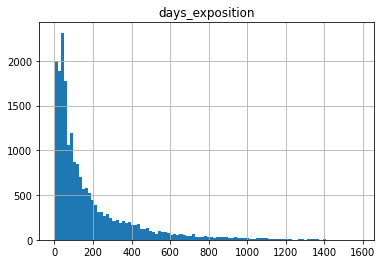

In [64]:
data.hist('days_exposition', bins=100)

In [65]:
data['days_exposition'].mean()

181.00601466992666

In [66]:
data['days_exposition'].median()

95.0

<AxesSubplot:>

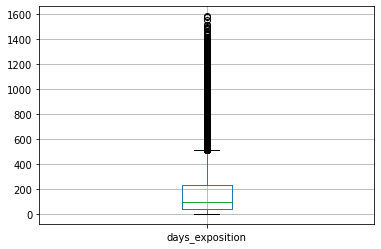

In [67]:
data.boxplot(column='days_exposition')

In [68]:
data['days_exposition'].describe()

count    20450.000000
mean       181.006015
std        219.923153
min          1.000000
25%         45.000000
50%         95.000000
75%        232.000000
max       1580.000000
Name: days_exposition, dtype: float64

На графике boxplot нижний ус заканчивается на нуле, значит, говорить о "слишком быстрых" продажах нельзя. Необычно долгими окажутся продажи с длительностью, оказавшейся выше конца верхнего уса, который заканчивается в точке 232+220 (75% + std), то есть продажи, занявшие 452 дня или дольше, могут считаться необычно долгими.

0.6537101083572163

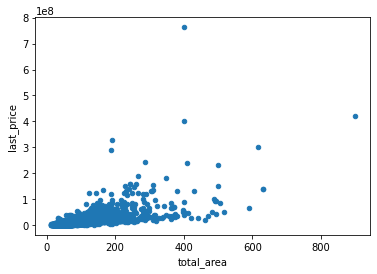

In [69]:
data.plot(x='total_area', y='last_price', kind='scatter')
data['total_area'].corr(data['last_price'])

За исключением выбросов, можно заметить, что между данными есть некоторая корреляция; это подтверждает и коэффициент Пирсона (значение 0,65 говорит о среднем уровне корреляции)

0.5561679139947159

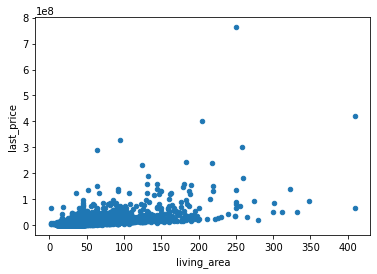

In [70]:
data.plot(x='living_area', y='last_price', kind='scatter')
data['living_area'].corr(data['last_price'])

Корреляция между жилой площадью и ценой все еще присутствует, но уже значительно менее сильная. чем в прошлом пункте (коэффициент Пирсона 0.55 - все еще средняя корреляция, но уже ниже)

0.4512765736807324

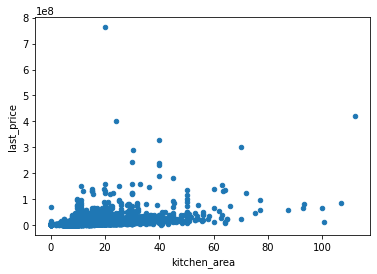

In [71]:
data.plot(x='kitchen_area', y='last_price', kind='scatter')
data['kitchen_area'].corr(data['last_price'])

Судя по графику, корреляция между площадью кухни и ценой еще меньше; это подтверждается и коэффициентом Пирсона - 0.45 соответствует слабой корреляции.

<AxesSubplot:xlabel='rooms', ylabel='last_price'>

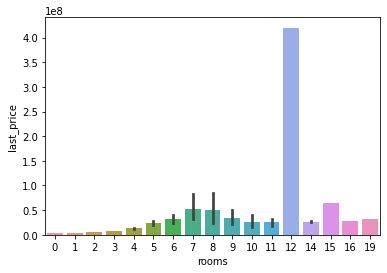

In [72]:
import seaborn
seaborn.barplot(x=data['rooms'], y=data['last_price'])

На графике виден одиночный выброс для квартир с 12 комнатами (скорее всего, это какая-нибудь очень дорогая локация) и выброс поменьше - для 15 комнат (аналогично). В остальном график зависимости от количества комнат выглядит как нормальное распределение, с пиком стоимости для квартир с 7 и 8 комнатами.

<AxesSubplot:xlabel='floor_group', ylabel='last_price'>

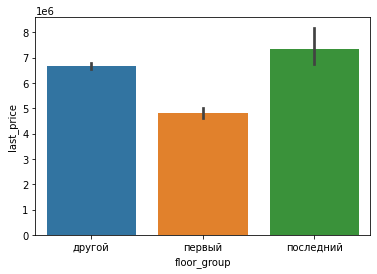

In [73]:
seaborn.barplot(x=data['floor_group'], y=data['last_price'])

Зависимость здесь очень похожа на линейную: первый этаж - наименьший по стоимости, а дальше - чем выше, тем больше становится стоимость.

<AxesSubplot:xlabel='weekday', ylabel='last_price'>

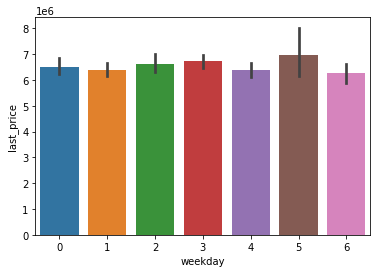

In [74]:
seaborn.barplot(x=data['weekday'], y=data['last_price'])

Можно заметить, что дороже остальных продаются квартиры, выставленные на продажу в субботу, а дешевле прочих - в пятницу и в воскресенье. 

<AxesSubplot:xlabel='month', ylabel='last_price'>

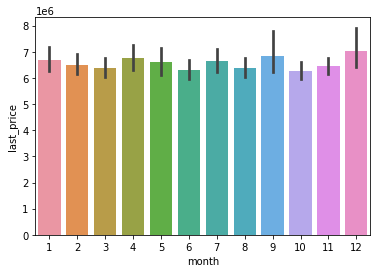

In [75]:
seaborn.barplot(x=data['month'], y=data['last_price'])

Заметно дороже других продаются квариры, выставленные на продажу в сентябре и в декабре, а дешевле других - в марте, июне, августе, октябре и ноябре.

<AxesSubplot:xlabel='year', ylabel='last_price'>

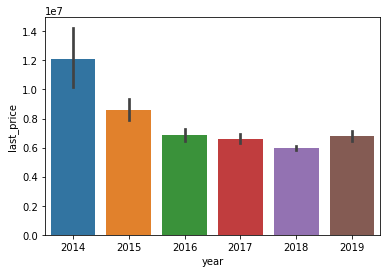

In [76]:
seaborn.barplot(x=data['year'], y=data['last_price'])

<AxesSubplot:xlabel='year', ylabel='total_area'>

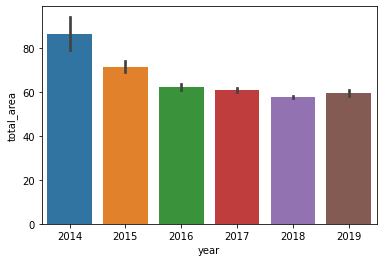

In [77]:
seaborn.barplot(x=data['year'], y=data['total_area'])

Можно заметить, что графики цены квартир и площади квартир по годам очень похожи - можно сделать вывод, что с поправкой на площадь стоимость квартир примерно одинаковая вне зависимости от года.

In [78]:
locs = data.groupby('locality_name').count().sort_values('last_price', ascending=False).head(10).index.values
display(locs)
data_locs = data[(data['locality_name'] == 'Санкт-Петербург') | (data['locality_name'] == 'посёлок Мурино') | \
    (data['locality_name'] == 'посёлок Шушары') | (data['locality_name'] == 'Всеволожск') | \
    (data['locality_name'] == 'Пушкин') | (data['locality_name'] == 'Колпино') | \
    (data['locality_name'] == 'посёлок Парголово') | (data['locality_name'] == 'Гатчина') | \
    (data['locality_name'] == 'деревня Кудрово') | (data['locality_name'] == 'Выборг')]
display(data_locs.groupby('locality_name')['m2_cost'].mean().sort_values())
data_locs.groupby('locality_name')['m2_cost'].median().sort_values()

array(['Санкт-Петербург', 'посёлок Мурино', 'посёлок Шушары',
       'Всеволожск', 'Пушкин', 'Колпино', 'посёлок Парголово', 'Гатчина',
       'деревня Кудрово', 'Выборг'], dtype=object)

locality_name
Выборг                58238.143141
Всеволожск            68719.320400
Гатчина               68746.146763
Колпино               75443.972838
посёлок Шушары        78677.364217
посёлок Мурино        85681.762601
посёлок Парголово     90205.423758
деревня Кудрово       92473.547576
Пушкин               103147.825496
Санкт-Петербург      114849.692339
Name: m2_cost, dtype: float64

locality_name
Выборг                58307.692308
Всеволожск            65789.473684
Гатчина               67796.610169
Колпино               74725.274725
посёлок Шушары        76876.172608
посёлок Мурино        85878.462169
посёлок Парголово     91780.224134
деревня Кудрово       91860.465116
Пушкин                99993.589744
Санкт-Петербург      104766.085539
Name: m2_cost, dtype: float64

In [79]:
data.groupby('locality_name').agg({'balcony':'count', 'last_price':'median'}) \
    .sort_values(by = 'balcony', ascending = False) \
    .head(10)

,balcony,last_price
locality_name,,
Санкт-Петербург,15682,5500000.0
посёлок Мурино,556,3400000.0
посёлок Шушары,440,3950000.0
Всеволожск,397,3450000.0
Пушкин,366,5187319.0
Колпино,337,3600000.0
посёлок Парголово,326,4115000.0
Гатчина,307,3100000.0
деревня Кудрово,299,3790000.0


Из городов с наибольшим количеством объявлений самый дорогой квадратный метр в Санкт-Петербурге, а самый дешевый - в Выборге (это подтверждается и средним арифметическим, и медианой)

'Медианная стоимость километра в Санкт-Петербурге равна:'

449923.0

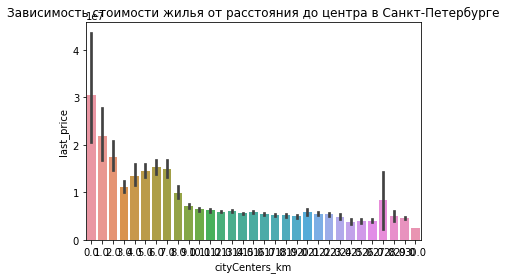

In [80]:
data_spb = data.query('locality_name == "Санкт-Петербург"')
data_spb['km_cost'] = data_spb['last_price'] // data_spb['cityCenters_km']
display('Медианная стоимость километра в Санкт-Петербурге равна:', data_spb['km_cost'].median())
seaborn.barplot(x=data_spb['cityCenters_km'], y=data_spb['last_price'])
plt.title('Зависимость стоимости жилья от расстояния до центра в Санкт-Петербурге');

Дороже всего квартиры, которые ближе всего к центру города; есть одиночный выброс на 27 километрах от центра (вероятно, какое-то элитное жилье), и еще один пик на 7-8 километрах от центра - вероятно, тоже какая-то элитная локация для жилья. После этого стоимость постоянно падает.

### Общий вывод

В ходе работы над исследованием было сделано следующее:
- заполнены пропуски в данных
- устранены неявные дубликаты (явных дубликатов обнаружено не было)
- добавлены новые столбцы с данными для анализа
- изменён тип данных в ряде столбцов на более подходящий для анализа
- удалены или исправлены аномальные значения
- изучены параметры объектов
- изучена зависимость цены от различных факторов
- выявлены населенные пункты с самой высокой и самой низкой стоимостью квадратного метра
- изучена зависимость стоимости квартиры от расстояния до центра города в Санкт-Петербурге


Стоимость квартир зависит от всех пунктов, которые мы рассматривали:
  - общей площади;
  - жилой площади;
  - площади кухни;
  - количества комнат;
  - типа этажа, на котором расположена квартира (первый, последний, другой);
  - даты размещения (день недели, месяц, год);
  
С общей площадью цена коррелирует лучше всего, корреляция с жилой площадью меньше, с площадью кухни - еще меньше. От типа этажа квартиры и года публикации цена зависит линейно, от дня/месяца публикации - непонятен тип зависимости, но можно выделить "хорошие" и "плохие" дни/месяцы.
От года публикации цена скорее не зависит, 

Чаще всего продажа квартиры занимает около 100 дней (медиана - 95), о слишком быстрых продажах говорить нельзя, необычно долгие продажи - за 452 дня или больше.

Самый дорогой квадратный метр жилья - в Санкт-Петербурге, самый дешевый - в Выборге.

С точки зрения расстояния до центра города в Санкт-Петербурге самый дорогие локации - в центре и на расстоянии 7-8 км от центра, так же есть одна квартира на расстоянии 27 км от центра - возможно, там какое-то элитное жилье.